In [20]:
#!/usr/bin/env python

# Thought Process:
#
# Could it be a simple substitution cipher?
# * Analyze single letter frequency
# * Analyze doubles + triple + quad group frequencies
#
# Since none of the digrams that appear seem common, perhaps this is Playfair?
# * The quads repeat "nn" quite a bit
#

import sys
def LOG(message = "\n"):
    sys.stdout.write(message)

NUM_SUBSTRING_LENGTH = 15
THRESHOLD_FREQ = 2

string1 = "AOGQJARFONJYROQOWJRJXYJTOGNEIIJJPQODAOGRONYPOZRONPNEIIJQOZLZDEPGOIJLDMEDBJPQLDBQJINEIIJFYPNJIOWORPWJGZJRCJGJRFOGTRNEYDPHNEIIJAODDRHMUJDLJZEPQLRREDNEIIJSEQDMLDNEMDNEIIJWODPREYPQWJGZCGEIAODDRHMUJDLJJDZROPPMOZLDGENTLDBQJINEYDPHNEIIJULGBLDLJZEPMJPOGNEIIJLDEDOROUODOLBQPPWENEIIJWQLMOPQOMJRPOUODPRECPQOJIOGLNJDGOUEMYPLEDWOGOLDAGEBGORRNEIIJJFGJQJIMLDNEMDNEIIJREDECSEQDJDZBGJDZCJPQOGECAGORLZODPMLDNEMDNEIIJIEUOZLDPETODPYNTHJDZPEETYAJPGJNPECBEUOGDIODPMJDZLDIOGNOGNEYDPHZEPLDPQOCLOMZFEETECZJDLOMFEEDONEIIJPQOTODPYNTHALEDOOGNEIIJZEPDEWLDAERRORRLEDECPQOWLRNEDRLDQLRPEGLNJMRENLOPHZEPNEIIJJAAOJGRPQOCEMMEWLDBDEPOECAYGNQJROJFGJQJIMLDNEMDODPOGRCLUOQYDZGOZJNGORECMJDZEDJPGOJRYGHWJGGJDPEDPQOREYPQRLZOECMLNTLDBNGOOTEGGLUOGNEIIJLDTODPYNTH"

string2 = "IVEWNFUILTVWGCGKDGWBUTUGVPLXKCBCAGVPUFZXUIUFVDZXVMMFNRXVLGAUECNQZXVPHBAVBNAQLXAUSPIAVWCXWUFEXWQVLMLQDFIVQEPAPWVQLXZTLSFYFDGAGYEFCGAUWSXWXVBTICAUXWVGRGWPLXAUPAPVLCGTTVRNYZINCWIWAUUFZXUIUFGWBZTZMWLQDFIVPWLRLOUGLGVEABPCTVACFGAIFBXLHFNBVTQAGTTARLQTDFIVPWLQGWXCWDAXQOSBGWIVMWWXFDQVUFGDLOEVWXEWXNVQEVFVKESBINUFVWCLXWOLLORLQTDFIVEWXLVGGFDTFGWGTDVEXLABTLAIUFUAWEAXGVVWGFINOLUFSIXIEURBFNVEAXTABLCSGTUDRYLQDFIVEWXLUFXWGFDTPSGCGTTDVEUFFEAUKTCGAIAVAXGVNFNAINLOCGWBRAXWSBGWIVMWWXFDBLCWVWCRQVGLGAUFXWUFXAGTTAOLCXAUCGWBRAXWSBGWIVMWWXFDWGTDVEAIQGKSRLQTDFGAUFXWWGTDVEPARYLOUGLGVENFDUQVEFGCBGRLQTDFUFUWWFDTIVMELZKAFPPAOGVGCSIWWXWEWKLXUFVWOGOLGZWTDTLGBWZXWGPVVXLGYZPSIWDCFGABZIFPRLQTDFHXUFTATVUTUFFEUFXWVDIWRNDTLBUFFEECNQZXVPHBAVXLAXRVYQVELBCMLQDFIVKAUATVQVLGBQNQGWIVMEABINWIVPDVLGQVSVQVEFMNVWWILGVQZXQBBLISLOWIVPBZUFFDRLQTDFPFINVTEDFGAHSBVEHBYIIVPEWXGVRYLQDFXSGTGUVEABDFUTUFXALXXLQLCLAUVFQEEVWBVPUFGVUFGWUGDWWQWFDTGKSAUFIVNBZCCPFNTWLQDFIVPWIBEDAILMIVSNGURZTYLQDFPSSQFSUEWXDFLIGTTVSINSOTNTGUDTZXXLCLABRYLQDFDWCGAUATXAVTWXMNWKLXIVMEAUWCIVABKTQMGHYMRLQTDFIVPQQBQGDGKAFPGKRLQTDFLNXWXLVTVDBWMWLQDFIVMVTAUFFPQVLCBQUFGVGTLCZXWQHWYITVANVEIWFPMNVWVPFOFDTVGWCNBHXVLGABLSIDEFSIRISPYTFGWPLXFPVWLGAIUTUFXASPYTFGRSXWGUABLSLQDFOLUTUFTWIDEFSIQVEFVPRNEWDWUGQREURLQTDFXLDWWQRGWIUEWQHWRLQTDFAUXNUEQGGSYIRLQTDFIVEDGVGFLIBQDVHDUGBEIVQEQWCUVBCGRLQTDFIVQVLPLOEWKYVDIWXNSXSIUIFPWGFCLOYFFSDUOIQBUFQVUFTVTAUTUFGWABQNLGEGWPHWRLQTDFIVEWPSGCUGFDVEWDHWBCLQUFTVIVPAINCGIEUAGXHVVEIHUGSBXCGXWXLCTZZCQVUTUFXWGWAUXNGWRLQTDFAUWIAPRLQTDFUFXWGWAUXNGWRLQTDFSAUFECNQZXVPRSBQUFLBBLVQLORBBWMEAIXFTVLONPXLDTRLQTDFIVMEAIGFAIAVLGAIQEQVUFGWIBMEAIGFCLAUKYWENSAVZIFPIVLXAUWQHWAUUFZXUIUFTWZXVMAIAVKGGFGCXCIBUIEMLXRNSPGUKCHIWTIEIBIPUTUFGWVWXCSGQVGLLXRLQTDFIWAGGQVFSIVERLQTDFGKLOKCVRVIRTRLGZEMLXASIWVGAVQXEGXWQVXFEUASIWIHWBAPBLSXXVSXVELXXGBQXGWIAPAUYIZXVMAXFVOCSNFURLQTDFIVEDZXVMWBUFXWNFDUFGRLQTDFHXUFVDZXVMWENAWGAIQOSBWIVPDTOLUTXLUFSIQZHBLMLQDFIWAUATFLYGWXDVYIZXVMRBUFAXFNVMLXAIQOSBRGWIAPUFFERLQTDFXLABPCTVCMLQDFFGDWWIVCHWWIKCCGXWKYVRDGNQVTDFVIXGMENXGUPSYMFEWGIWIBKAGUBZEXFUDGNQVTKTCGQVFGLOKGSQNRTWLQDFBCLQIHATMLFEBNIPIBKAUAWELBUGVSSPAUMEBRTWLQDFHXUFWEVGAVQRGTGVIFVTQVUTUFGVAUXLVMGYIVTWQVUGRNHAVRAUAIPELOVWYCNRCGAUYFIVVGVCAUISECIWRNQBEXFUAIUTUFGDIWWGINXWYIWEXLAXGFVESIXLUFGAQRXWUFRYLQDFIVKAVWVPUFTWIDEFSIDVWXUFXVOZCURVNFNAINRNTZRNOIVBWQYAVRXWGVLXFNVMLXRNDTGFDTPSECIWAUIVMEAUWGRLVPDFUGYAVRXWGVLXFNOFEUFGDWPNGVXWFVZCAUIVQVVGLXAUCQIVQVGFILLXAUIVEWOLUFXWDFLSLQDFUFGVFGDWYIXAKYFPWGFCQVGFGFWIYTSBZXCIFWLMLQDFHXGLBRVQWUAVSBRGWGIWFSQZOZIVQEQVEFGCVWRLQTDFRZTYLQVWYCNRPGVTLGRZIMXVMNVAXWRHWESIEVVERLQTDFYALZXAVBLFVBPWLBUFTDHXGFVGAVCQGUFDIVWULMLQDFLOVFVPRLQTDFYAZBWEVAXWPZVRVIEFOTVCAIGFECIWXLAXWGIWFSQU"

stringToCrack = string1

# Determine frequency analysis of characters
def findNSeq(n, string):
    histogram = dict()
    for i in range(0, len(string) - n + 1):
        a = string[i:i+n]
        if a not in histogram:
            histogram[a] = 1
        else:
            histogram[a] = histogram[a] + 1
    return histogram

listFreq = [[]]
for i in range(1, NUM_SUBSTRING_LENGTH):
    listFreq.append(findNSeq(i, stringToCrack))

def returnSortedTuples(freq):
    tupleList = [(a, freq[a]) for a in freq]
    tupleList.sort(key = lambda a: a[1], reverse = True)
    return tupleList

sortedListFreq = []
for freq in listFreq:
    sortedListFreq.append(returnSortedTuples(freq))

letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz"
letterFrequencyOrder = "etaoinshrldcumfpgwybvkxjqz"
letterFrequencyOrder = "etaoilnshrdcumfpgwybvkxjqz"
letterFrequencyOrder = "eatoilnshrdcumfpgwybvkxjqz"
letterFrequencyOrder = "eatoilnhsrdcumfpgwybvkxjqz"

letterFrequencyOrder = "teaoilnshrdcumfpgwybvkxjqz"
letterFrequencyOrder = "teaoilnshrdcumfwpgybvkxjqz"
letterFrequencyOrder = "teaoilnhsrdcumfwpgybvkxjqz"
letterFrequencyOrder = "etaoilnhsrdcumfwpgybvkxjqz"
letterFrequencyOrder = "etaoilnhsrdcumfpwgybvkxjqz"
letterFrequencyOrder = "etaoilhnsrdcumfpwgybvkxjqz"
letterFrequencyOrder = "teaoilhnsrdcumfpwgybvkxjqz"
# letterFrequencyOrder = "eariotnslcudpmhgbfywkvxzjq"
letterFrequencyOrder = "-etaoinsrhldcumfpgwybvkxjqz"

###
letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz"
letterFrequencyOrder = "eatoinsrhldcumfpgwybvkxjqz"
letterFrequencyOrder = "eatoinsrhl----------------"
letterFrequencyOrder = "eatoisnrhl----------------"
letterFrequencyOrder = "eatoisnhrl----------------"
letterFrequencyOrder = "eatoilnhrs----------------"
letterFrequencyOrder = "eatoinlhrs----------------"
letterFrequencyOrder = "1111222222----------------"
letterFrequencyOrder = "EaToinlHrs----------------"

###
letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz"
letterFrequencyOrder = "EtaOiLsHrndcumfpgwybvkxjqz" # Guess "HELLO" is a common string
letterFrequencyOrder = "EaTOiLsHrndcumfpgwybvkxjqz" # Guess "THE" appears somewhat often

###
letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz" # Try to brute force the top 4 and middle 6

###
letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz" 
letterFrequencyOrder = "OetAiMnCsrhldufpgwybvkxjqz" # Comma
letterFrequencyOrder = "OeiATMnCsrhDlufpgwybvkxjqz" # Dot?
letterFrequencyOrder = "OEiATMnCsrHDlufpgwybvkxjqz" # The?
letterFrequencyOrder = "OEIATMnCsrHDlufpgwybvkxjqz" # Aid
letterFrequencyOrder = "OErATMiCnSHDlufpgwykvBxjqz" # Because
letterFrequencyOrder = "OErATMiCnSHDlUfpgWykvBxjqz" # Was
letterFrequencyOrder = "OEnATMiCRSHDlUfpgWykvBxjqz" # Persecuted
letterFrequencyOrder = "OEnATMiCRSHDlUfPgWykvBxjqz" # Perhaps
letterFrequencyOrder = "OENATMICRSHDlUfPvWykGBxjqz" # Did not remain long
letterFrequencyOrder = "OENATMICRSHDlUFPvWykGBxjqz" # Westward as far
letterFrequencyOrder = "OENATMICRSHDlUFPvWYVGBxjqz" # Pennsylvania
letterFrequencyOrder = "OENATMICRSHDLUFPvWYVGBxjqz" # Lincoln,
letterFrequencyOrder = "OENATMICRSHDLUFPKWYVGBJxqz" # Rockingham
letterFrequencyOrder = "OENATMICRSHDLUFPKWYVGBJQxz" # Quaker
letterFrequencyOrder = "OENATMICRSHDLUFPKWYVGBJQ--" # Quaker
letterFrequencyOrder = "OENATMIRCSHDLUFKPWYVGBJQ--" # Perhaps
letterFrequencyOrder = "OENATMIRCSHLDUFKPWVGYBJQ--" # ...everything else

# letterFrequencyOrder = "etaoinsrhldcumfpgwybvkxjqz" 



sortedHistogram = sortedListFreq[1]
cipher = {}
for i in range(0, len(sortedHistogram)):
    LOG('"{}": "{}",\n'.format(sortedHistogram[i][0], letterFrequencyOrder[i]))
    cipher[sortedHistogram[i][0]] = letterFrequencyOrder[i]

def decipher(string):
    decipheredString = ""
    for a in string:
        if a in cipher:
            decipheredString += cipher[a]
        else:
            decipheredString += "_"
    return decipheredString

def dumpList(listToDump):
    count = 0
    for a in listToDump:
        if a[1] > THRESHOLD_FREQ:
            LOG("{} ({}): {:3d} |  ".format(a[0], decipher(a[0]), a[1]))
            count = count + 1
            if count % 5 == 0:
                LOG()
    LOG()

LOG()
for freq in sortedListFreq:
    dumpList(freq)
    LOG()
    
LOG()
LOG(stringToCrack)
LOG()
LOG()
LOG(decipher(stringToCrack))
LOG()


"E": "O",
"O": "E",
"D": "N",
"J": "A",
"P": "T",
"I": "M",
"L": "I",
"G": "R",
"N": "C",
"R": "S",
"Q": "H",
"M": "L",
"Z": "D",
"Y": "U",
"C": "F",
"T": "K",
"A": "P",
"W": "W",
"U": "V",
"B": "G",
"H": "Y",
"F": "B",
"S": "J",
"X": "Q",



E (O):  74 |  O (E):  71 |  D (N):  69 |  J (A):  66 |  P (T):  49 |  
I (M):  43 |  L (I):  42 |  G (R):  41 |  N (C):  41 |  R (S):  37 |  
Q (H):  27 |  M (L):  24 |  Z (D):  24 |  Y (U):  17 |  C (F):  15 |  
T (K):  13 |  A (P):  13 |  W (W):  12 |  U (V):  10 |  B (G):  10 |  
H (Y):  10 |  F (B):   7 |  

NE (CO):  24 |  LD (IN):  19 |  IJ (MA):  17 |  EI (OM):  17 |  II (MM):  16 |  
DP (NT):  15 |  OG (ER):  14 |  PQ (TH):  13 |  OD (EN):  12 |  QO (HE):  11 |  
ED (ON):  11 |  JD (AN):  11 |  EC (OF):   9 |  GO (RE):   9 |  DN (NC):   8 |  
EP (OT):   7 |  JI (AM):   7 |  OR (ES):   7 |  JR (AS):   7 |  JP (AT):   7 |  
RO (SE):   7 |  GN (RC):   7 |  RE (SO):   7 |  DZ (ND):   7 |  QJ (HA):   6 |  
DE (NO):   6 |  UO (VE):   6 |  EM (OL

[('a', 69), ('b', 10), ('c', 24), ('d', 27), ('e', 74), ('f', 15), ('g', 13), ('h', 41), ('i', 49), ('j', 1), ('k', 7), ('l', 37), ('m', 17), ('n', 43), ('o', 66), ('p', 13), ('r', 41), ('s', 42), ('t', 71), ('u', 24), ('v', 10), ('w', 12), ('x', 2), ('y', 10)]
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
[69, 10, 24, 27, 74, 15, 13, 41, 49, 1, 7, 37, 17, 43, 66, 13, 41, 42, 71, 24, 10, 12, 2, 10]


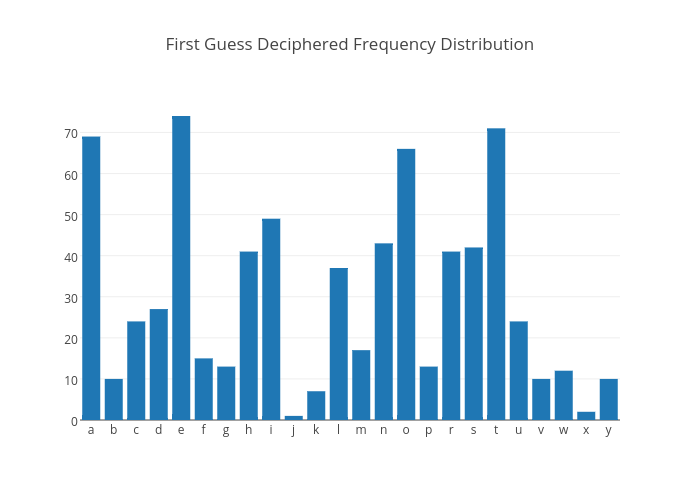

In [19]:
###
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import Image, display

py.sign_in('dchanman', 'ft6navmtad')

freq = sortedListFreq[1]
freqDeciphered = [(decipher(a[0]).lower(), a[1]) for a in freq]
freqDeciphered.sort(key = lambda a: a[0])
print(freqDeciphered)
print([a[0] for a in freqDeciphered])
print([a[1] for a in freqDeciphered])

data = [go.Bar(
        x = [a[0] for a in freqDeciphered],
        y = [a[1] for a in freqDeciphered]
)]
layout = go.Layout(title='First Guess Deciphered Frequency Distribution')
fig = go.Figure(data=data,layout=layout)
# Save the figure as a png image:
py.image.save_as(fig, 'deciphered0.png')

display(Image(filename='deciphered0.png'))